### Task-1

* Each record in represents an event by a visitor on an eCommerce website, with the following information:
### DataFields

  clicked_epoch (UNIX timestamp in seconds)

  date

  user_id

  product_id

  price

  category

* Objective: Write a python script to assign a “Session ID” to every record in the data.

In [3]:
# loading libraries
import pandas as pd
from datetime import timedelta
from datetime import datetime

In [4]:
# Reading csv file
data=pd.read_csv('C:/Users/abc/Downloads/clickStream.csv')

In [5]:
data.shape

(413913, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413913 entries, 0 to 413912
Data columns (total 6 columns):
clicked_epoch    413913 non-null float64
uuid             413913 non-null int64
date             413913 non-null object
price            413913 non-null float64
product_id       413913 non-null int64
category         413913 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 18.9+ MB


In [7]:
data.head() # printing first 5 rows

,clicked_epoch,uuid,date,price,product_id,category
0,1.496273e+09,110971,2017-06-01,599.5,122712,kurta & kurtis
1,1.496273e+09,110971,2017-06-01,599.5,3453,kurta & kurtis
2,1.496276e+09,49864,2017-06-01,1349.1,13610,jeans
3,1.496277e+09,49864,2017-06-01,1124.1,48309,jeans
4,1.496280e+09,21453,2017-06-01,999.0,133239,kurta & kurtis


In [8]:
new_data=data[['uuid','clicked_epoch']] # Creating a subset of data to assign session_id to every row

In [9]:
T=15*60 #Setting the time after which session expires if user is inactive

In [10]:
# add a column containing previous timestamp

start=datetime.now() # Storing the current time in start variable
new_data =  pd.concat([new_data, new_data.groupby('uuid').transform(lambda x:x.shift(1))], axis=1)

In [11]:
new_data.columns = ['user_id','clicked_epoch','prev_mytimestamp']

In [12]:
new_data['new_session'] = ((new_data['clicked_epoch'] - new_data['prev_mytimestamp'])>=T).astype(int)

In [13]:
new_data.head()

,user_id,clicked_epoch,prev_mytimestamp,new_session
0,110971,1.496273e+09,NaN,0
1,110971,1.496273e+09,1.496273e+09,0
2,49864,1.496276e+09,NaN,0
3,49864,1.496277e+09,1.496276e+09,0
4,21453,1.496280e+09,NaN,0


In [14]:
new_data['increment'] = new_data.groupby("user_id")['new_session'].cumsum()
new_data['session_id'] = new_data['user_id'].astype(str) + '_' + new_data['increment'].astype(str)
end=datetime.now()

In [15]:
new_data=new_data[['user_id','clicked_epoch','session_id']]
new_data.head()

,user_id,clicked_epoch,session_id
0,110971,1.496273e+09,110971_0
1,110971,1.496273e+09,110971_0
2,49864,1.496276e+09,49864_0
3,49864,1.496277e+09,49864_0
4,21453,1.496280e+09,21453_0


In [16]:
print("Total Time for the completion of Task1",end-start)

Total Time for the completion of Task1 0:01:07.848225


### Task-2

* For every transaction, the following fields have been provided:
### DataFields

  product_id

  category

  date

* Objective:For each category in the dataset, find out if there is a seasonal pattern in purchase behaviour. Correspondingly, generate seasonal scores (Range: [0, 1]) for each category across seasons* to indicate seasonal relevance of the category at a given time period.

In [80]:
# Reading csv file
start=datetime.now()
transact_data=pd.read_csv('C:/Users/abc/Downloads/transactions.csv')

In [62]:
transact_data.shape

(1203105, 4)

In [63]:
transact_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203105 entries, 0 to 1203104
Data columns (total 4 columns):
transaction_id    1203105 non-null int64
product_id        1203105 non-null int64
category          1203105 non-null object
date              1203105 non-null object
dtypes: int64(2), object(2)
memory usage: 36.7+ MB


In [64]:
transact_data.head() # Printing first 5 rows

,transaction_id,product_id,category,date
0,1,662685,Casual Dress,2017-10-01
1,2,154881,Casual Dress,2017-10-01
2,3,220036,Casual Dress,2017-10-01
3,4,220036,Casual Dress,2017-10-01
4,5,950839,Pullover Sweater,2017-10-01


In [65]:
transact_data.category.value_counts()

Casual Dress         776888
Pullover Sweater     244096
Sleeveless Blouse    175913
Fleece Jacket          6208
Name: category, dtype: int64

In [81]:
transact_data.date = pd.to_datetime(transact_data.date) 
transact_data['month']=transact_data['date'].dt.month # Creating a new column 'month' in the dataset

In [67]:
transact_data.head() # printing rows after creating month column

,transaction_id,product_id,category,date,month
0,1,662685,Casual Dress,2017-10-01,10
1,2,154881,Casual Dress,2017-10-01,10
2,3,220036,Casual Dress,2017-10-01,10
3,4,220036,Casual Dress,2017-10-01,10
4,5,950839,Pullover Sweater,2017-10-01,10


In [68]:
# storing the count of each category per month in transact_data variable
transact_data=transact_data[['month','category','product_id']].groupby(['month','category'], as_index=False).count()

In [69]:
transact_data

,month,category,product_id
0,1,Casual Dress,66649
1,1,Fleece Jacket,498
2,1,Pullover Sweater,22481
3,1,Sleeveless Blouse,14674
4,2,Casual Dress,91162
5,2,Fleece Jacket,474
6,2,Pullover Sweater,24109
7,2,Sleeveless Blouse,22752
8,3,Casual Dress,82695
9,3,Fleece Jacket,407


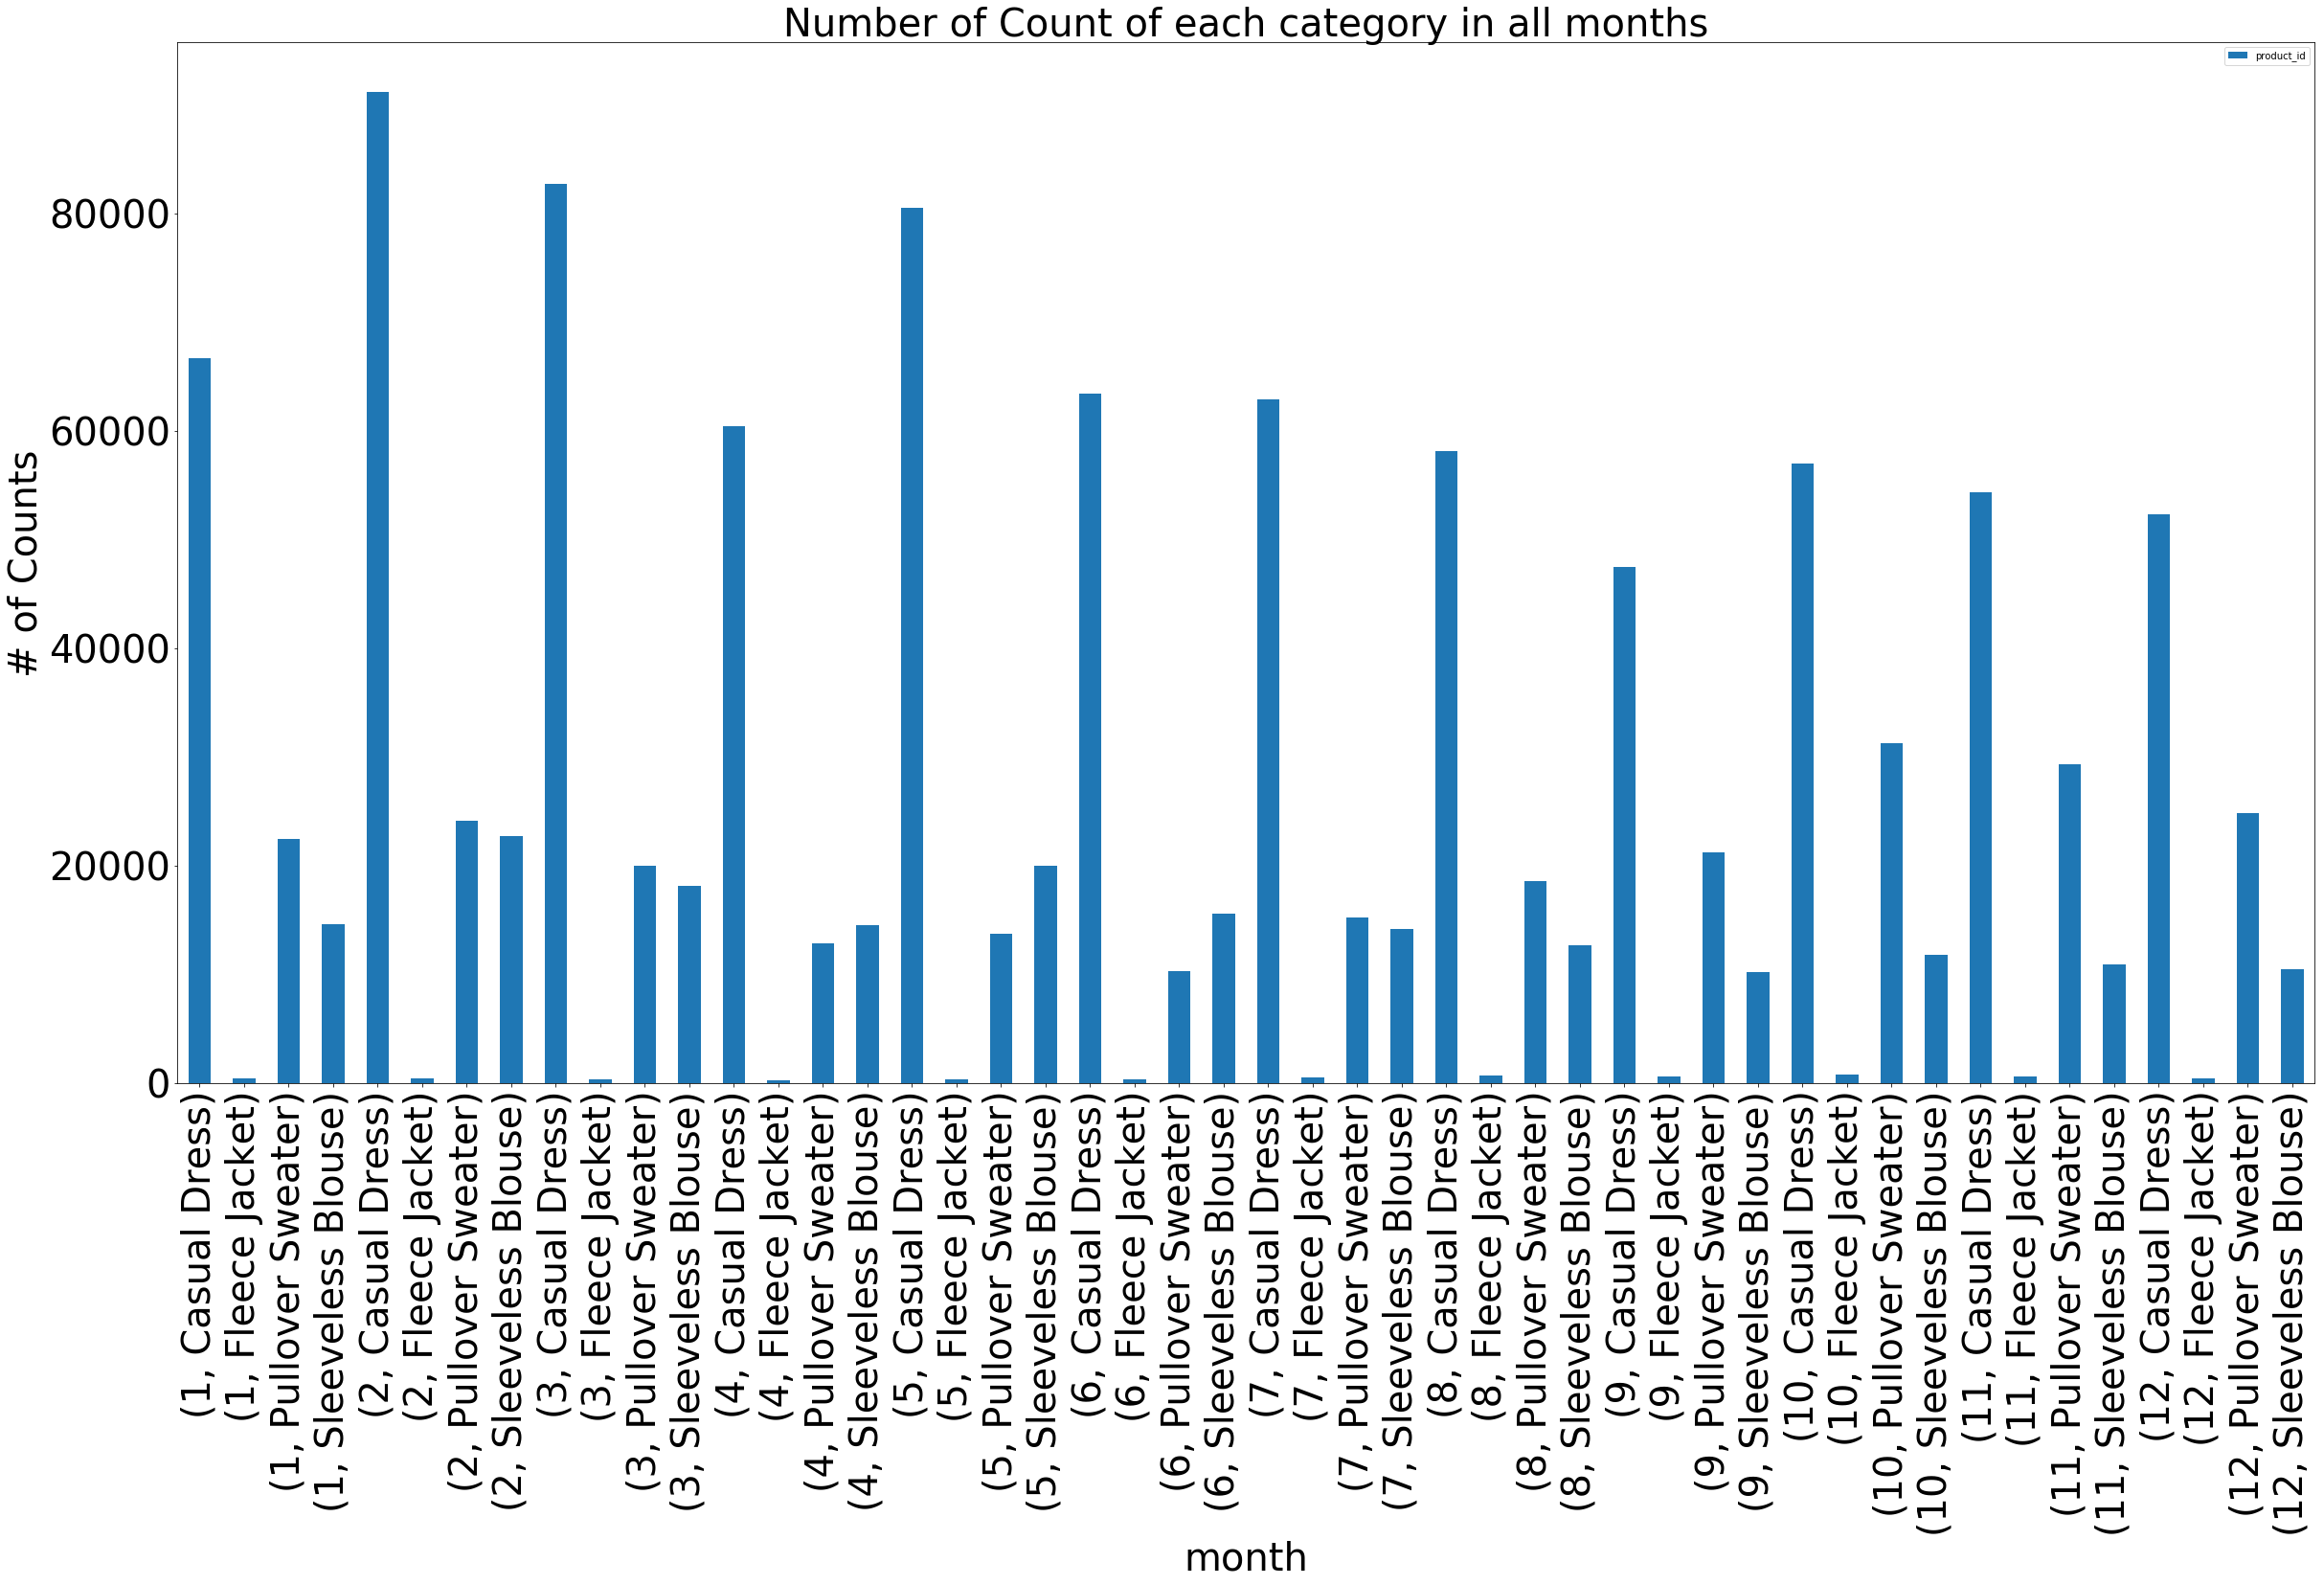

In [82]:
import matplotlib.pyplot as plt
transact_data[['month','category','product_id']].groupby(['month','category']).count().plot.bar(figsize=(40,20), linewidth=5, fontsize=40)
plt.xlabel('month',fontsize=40)
plt.ylabel('# of Counts',fontsize=40)
plt.title('Number of Count of each category in all months',fontsize=40)
plt.show()

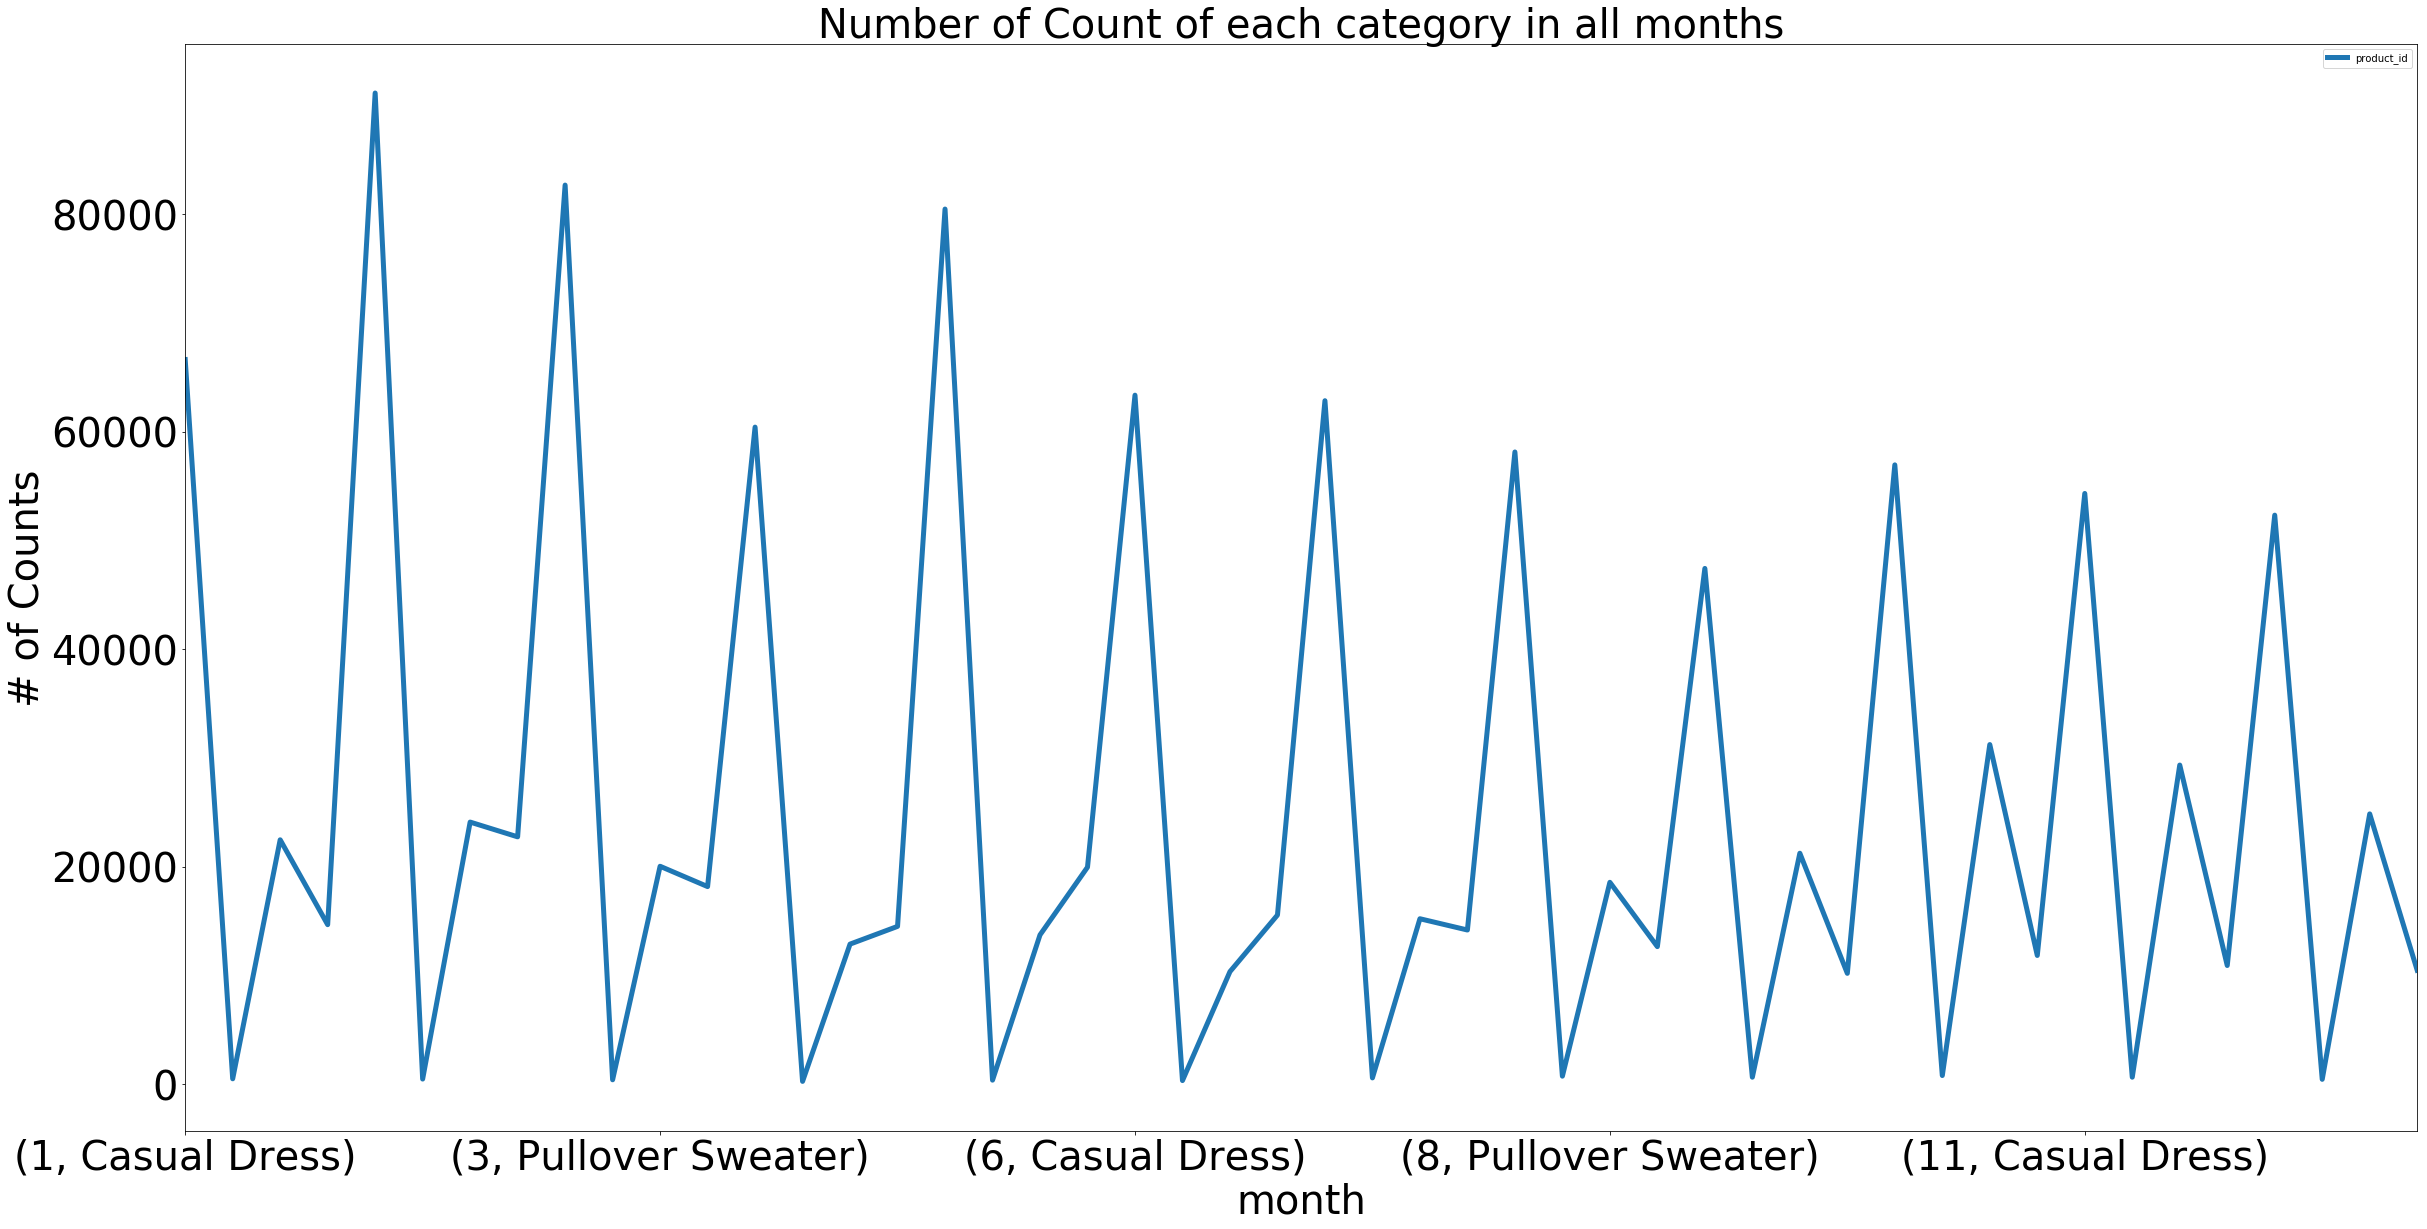

In [83]:
transact_data[['month','category','product_id']].groupby(['month','category']).count().plot(figsize=(40,20), linewidth=5, fontsize=40)
plt.xlabel('month',fontsize=40)
plt.ylabel('# of Counts',fontsize=40)
plt.title('Number of Count of each category in all months',fontsize=40)
plt.show()

In [72]:
# storing the count of category per month in transact_data_per_month variable
transact_data_per_month=transact_data.groupby('month',as_index=False)['product_id'].sum()

In [73]:
transact_data_per_month

,month,product_id
0,1,104302
1,2,138497
2,3,121324
3,4,88097
4,5,114558
5,6,89623
6,7,92848
7,8,90111
8,9,79523
9,10,100841


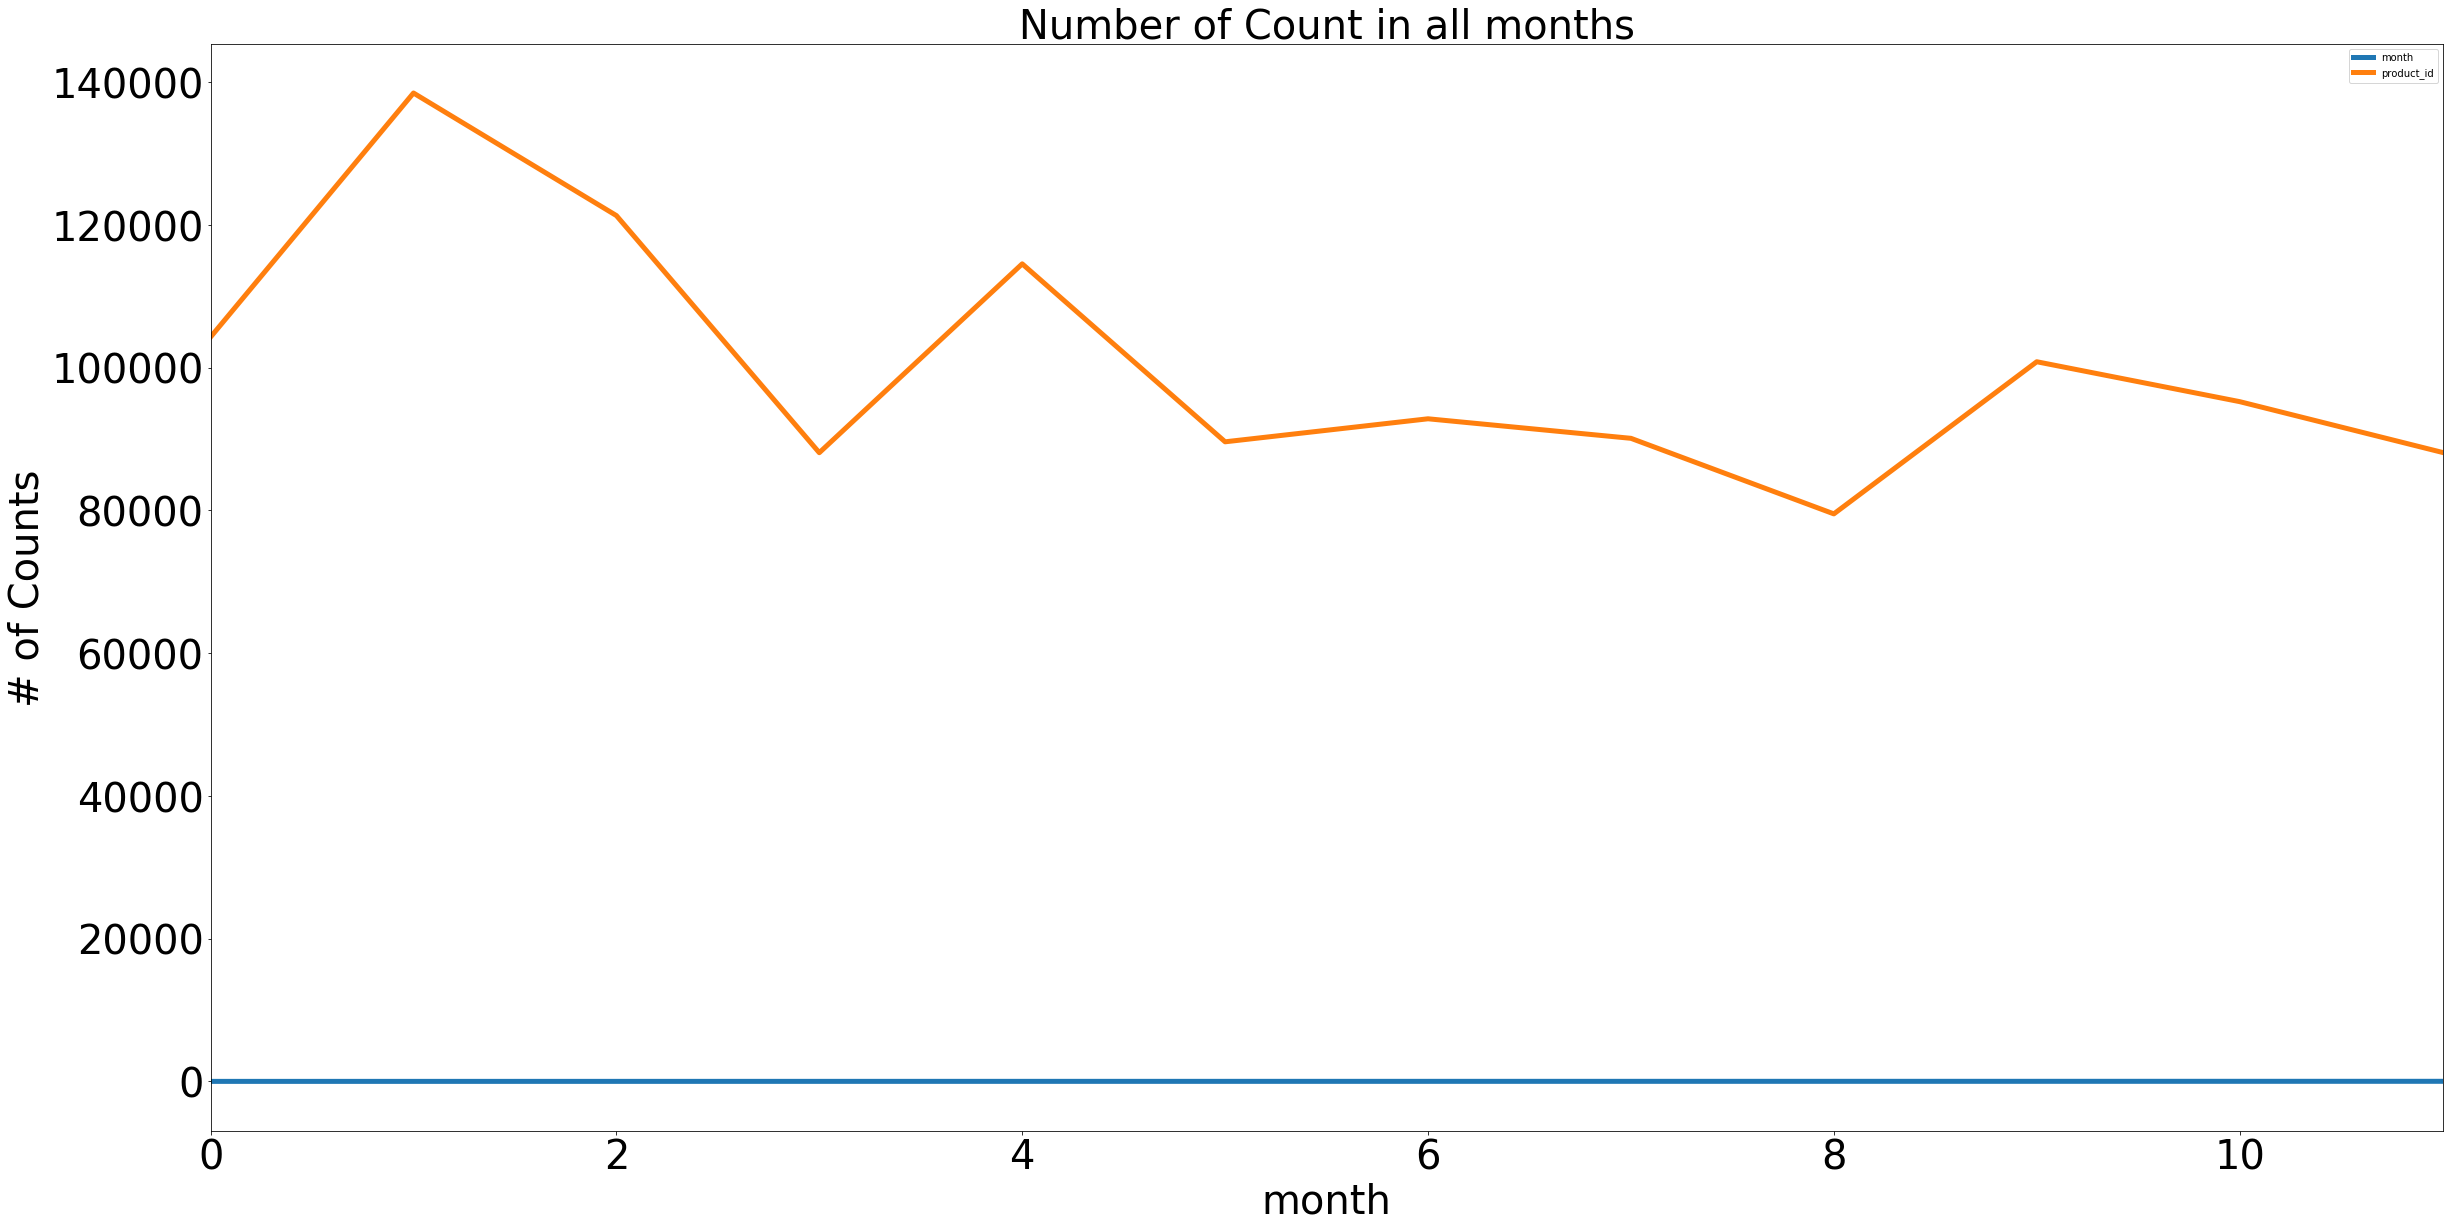

In [74]:
transact_data_per_month.plot(figsize=(40,20), linewidth=5, fontsize=40)

plt.xlabel('month',fontsize=40)
plt.ylabel('# of Counts',fontsize=40)
plt.title('Number of Count in all months',fontsize=40)
plt.show()

In [75]:
required_data=pd.merge(transact_data,transact_data_per_month,on='month') # merging both the required data

In [76]:
# Calculating seasonal_score of each category per month to check the relevance
required_data['seasonal_score']=required_data['product_id_x']/required_data['product_id_y']

In [77]:
required_data

,month,category,product_id_x,product_id_y,seasonal_score
0,1,Casual Dress,66649,104302,0.639000
1,1,Fleece Jacket,498,104302,0.004775
2,1,Pullover Sweater,22481,104302,0.215538
3,1,Sleeveless Blouse,14674,104302,0.140688
4,2,Casual Dress,91162,138497,0.658224
5,2,Fleece Jacket,474,138497,0.003422
6,2,Pullover Sweater,24109,138497,0.174076
7,2,Sleeveless Blouse,22752,138497,0.164278
8,3,Casual Dress,82695,121324,0.681605
9,3,Fleece Jacket,407,121324,0.003355


In [78]:
end=datetime.now()

In [79]:
print('Total time taken for Task2 is',end-start)

Total time taken for Task2 is 0:00:23.830465
